In [33]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [34]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [35]:
fetch_housing_data()

In [36]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [37]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [40]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

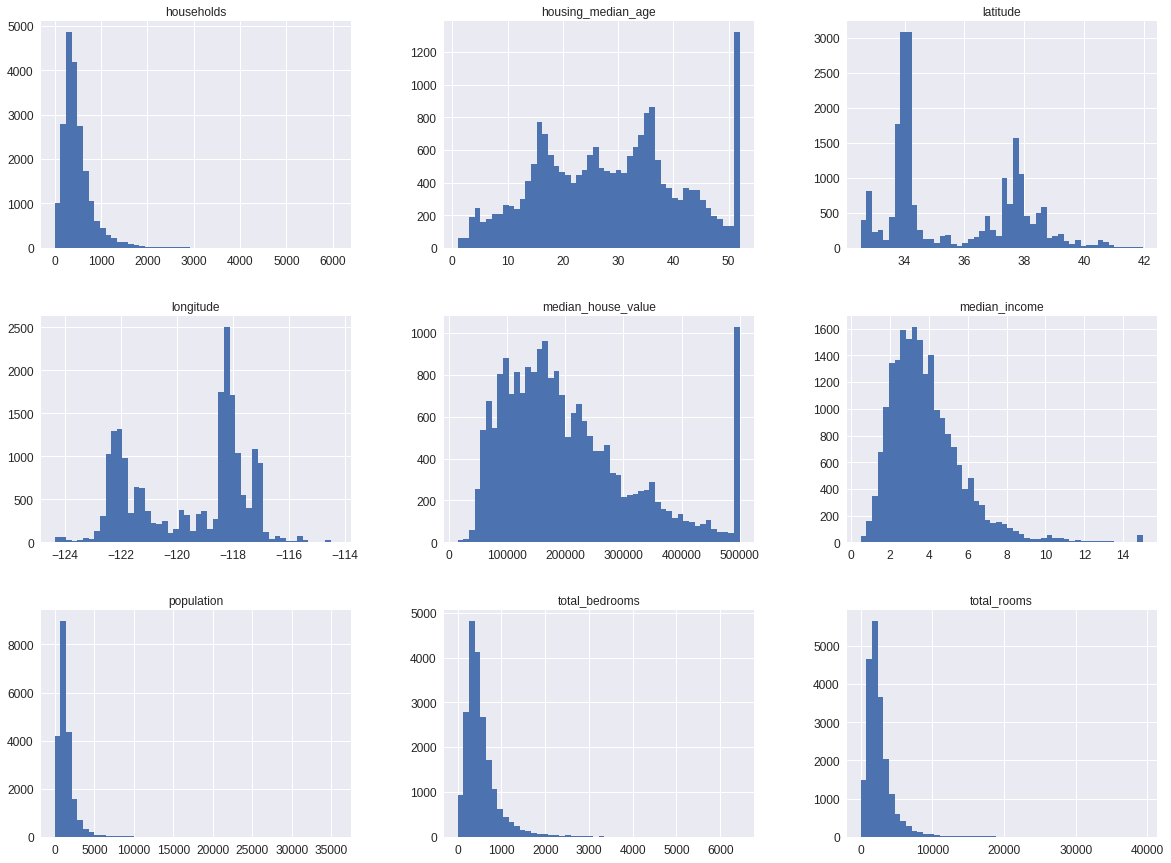

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
housing.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots.png")

In [42]:
np.random.seed(42) # To make output's identical after every runes

In [43]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
#     train_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [44]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [45]:
# import hashlib

# def test_set_check(identifier, test_ratio, hash):
#     return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

# def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
#     return data.loc[~in_test_set], data.loc[in_test_set]


In [46]:
# housing_with_id = housing.reset_index()   # adds an `index` column
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [47]:
# housing_with_id = housing.reset_index()   # adds an `index` column
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [48]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [49]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2 , random_state=42)

In [50]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)

In [51]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

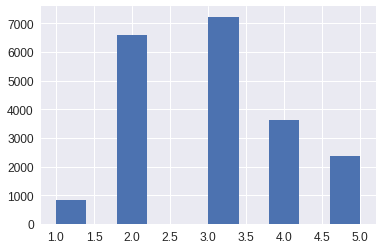

In [52]:
housing["income_cat"].hist()

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [54]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [55]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
compare_props = pd.DataFrame({
    "overall": income_cat_proportions(housing),
    "random": income_cat_proportions(test_set),
    "strata": income_cat_proportions(strat_test_set)
}).sort_index()
compare_props["Rand. error%"] = 100*compare_props["random"]/compare_props["overall"]-100
compare_props["Strat. error%"] = 100*compare_props["strata"]/compare_props["overall"]-100



In [56]:
compare_props

,overall,random,strata,Rand. error%,Strat. error%
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [57]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [58]:
housing = strat_train_set.copy()

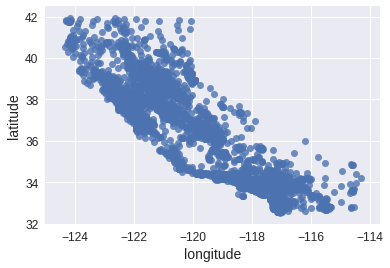

In [59]:
badplot=sns.regplot(data=housing, fit_reg=False, x="longitude", y="latitude")
fig=badplot.get_figure()
fig.savefig("bad_visualization_plot.png")

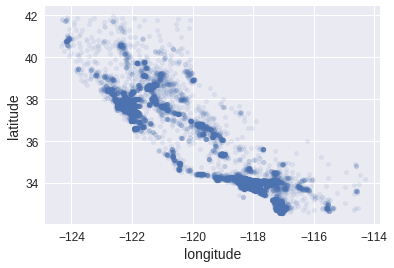

In [60]:
goodplot=housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
fig=goodplot.get_figure()
fig.savefig("good_visualization_plot.png")

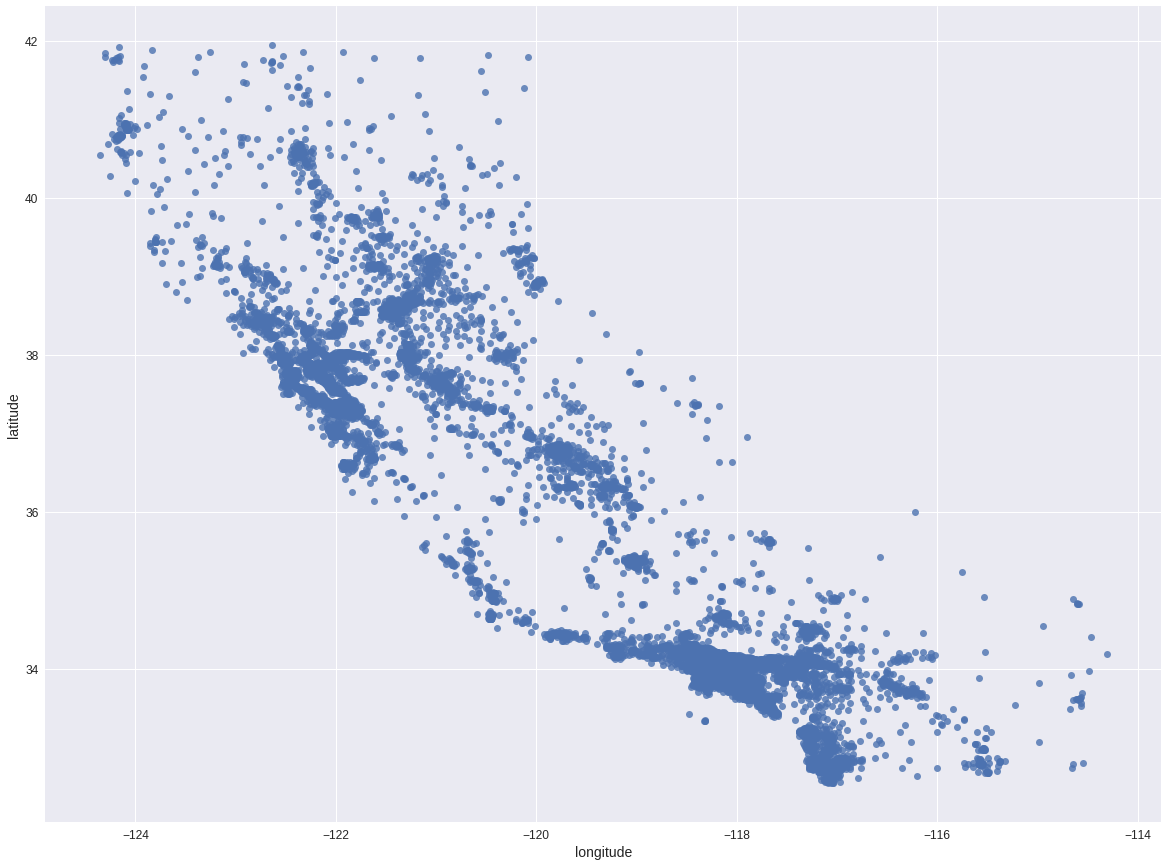

In [61]:
x=np.arange(20)
y1=x/2+4
y2=5*x**3
fig, ax = plt.subplots(figsize=(20,15))
sns.regplot(data=housing, x="longitude", y="latitude", fit_reg=False, ax=ax)

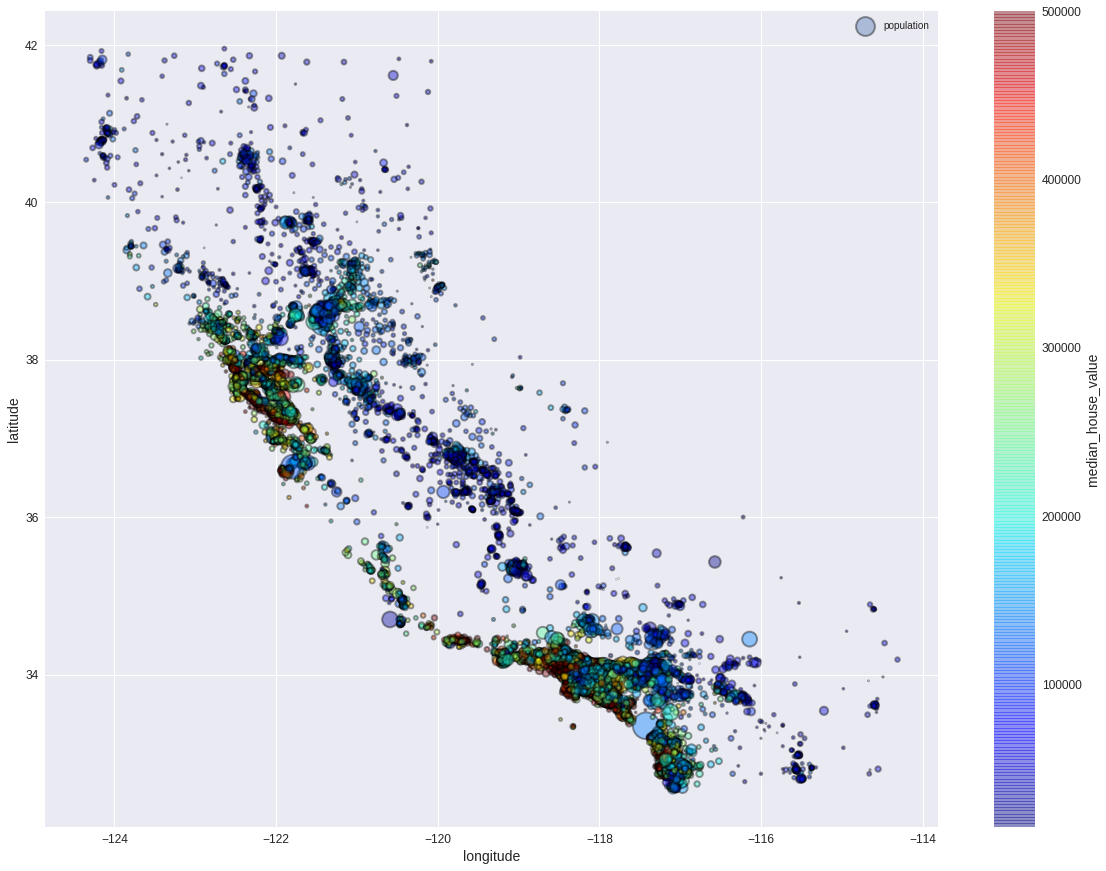

In [62]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/50, label="population", figsize=(20,15),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False, edgecolor='black', linewidth=2)
plt.legend()
plt.savefig("housing_prices_scatterplot.png")

In [63]:
corr_matrix = housing.corr()

In [64]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687691
total_rooms           0.133371
housing_median_age    0.108680
households            0.064481
total_bedrooms        0.047338
population           -0.026199
longitude            -0.046952
latitude             -0.144846
Name: median_house_value, dtype: float64

/home/gaddafi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


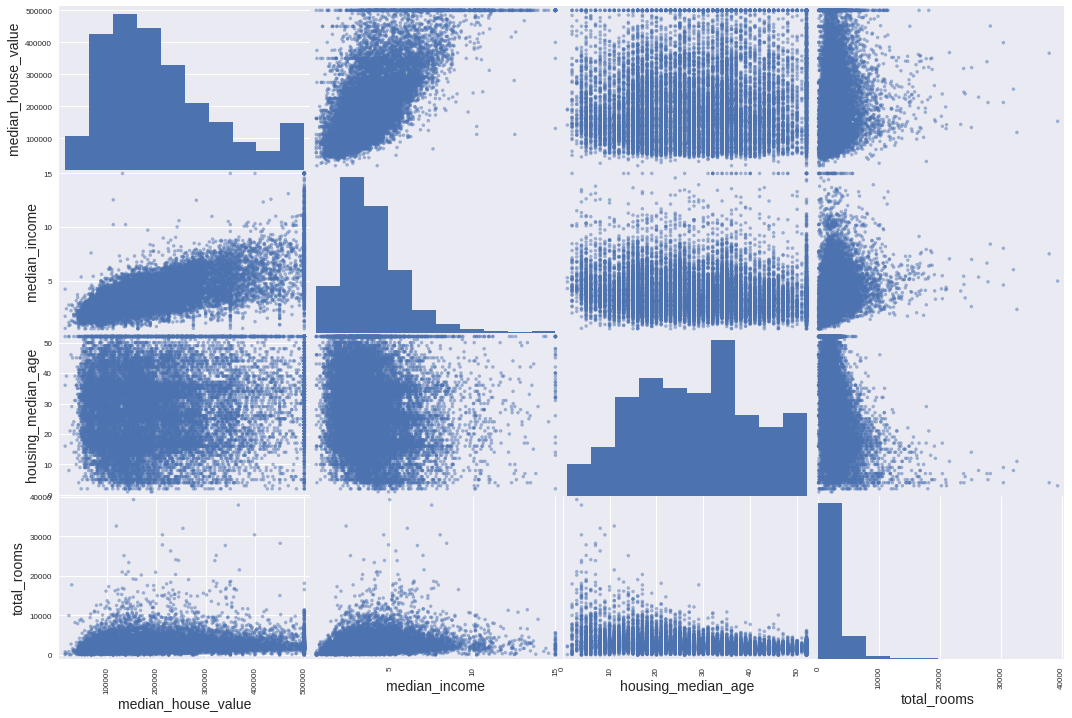

In [65]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "housing_median_age", "total_rooms"]
scatter_matrix(housing[attributes], figsize=(18,12))
plt.savefig("scatter_matrix_plot.png")

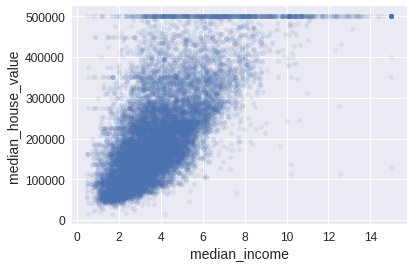

In [66]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
# plt.axis([0, 16, 0, 550000])
plt.savefig("income_vs_house_value_scatterplot.png")

In [67]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [68]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687691
rooms_per_household         0.145258
total_rooms                 0.133371
housing_median_age          0.108680
households                  0.064481
total_bedrooms              0.047338
population_per_household   -0.024885
population                 -0.026199
longitude                  -0.046952
latitude                   -0.144846
bedrooms_per_room          -0.255939
Name: median_house_value, dtype: float64

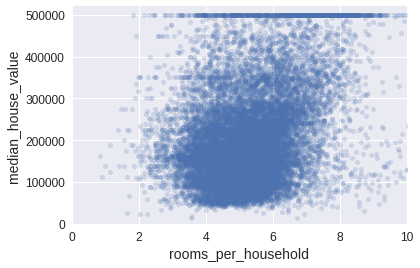

In [69]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 10, 0, 520000])
plt.show()

In [70]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [71]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19932,-119.33,36.30,11.0,3045.0,NaN,1563.0,516.0,5.4337,INLAND
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
13933,-117.31,34.25,29.0,4610.0,NaN,1569.0,592.0,2.7663,INLAND
7806,-118.09,33.89,42.0,991.0,NaN,717.0,219.0,4.0926,<1H OCEAN


In [72]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19932,-119.33,36.30,11.0,3045.0,1563.0,516.0,5.4337,INLAND
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
13933,-117.31,34.25,29.0,4610.0,1569.0,592.0,2.7663,INLAND
7806,-118.09,33.89,42.0,991.0,717.0,219.0,4.0926,<1H OCEAN
9622,-120.32,37.29,38.0,576.0,478.0,112.0,2.3382,INLAND
13597,-117.28,34.09,44.0,376.0,273.0,107.0,2.2917,INLAND
10236,-117.92,33.87,33.0,1597.0,1888.0,423.0,3.0550,<1H OCEAN
4279,-118.31,34.09,37.0,773.0,835.0,312.0,1.8576,<1H OCEAN
16038,-122.46,37.72,39.0,2254.0,1388.0,404.0,2.9688,NEAR OCEAN


In [73]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

/home/gaddafi/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13656,-117.30,34.05,6.0,2155.0,436.0,1039.0,391.0,1.6675,INLAND
19932,-119.33,36.30,11.0,3045.0,436.0,1563.0,516.0,5.4337,INLAND
19150,-122.70,38.35,14.0,2313.0,436.0,954.0,397.0,3.7813,<1H OCEAN
13933,-117.31,34.25,29.0,4610.0,436.0,1569.0,592.0,2.7663,INLAND
7806,-118.09,33.89,42.0,991.0,436.0,717.0,219.0,4.0926,<1H OCEAN
9622,-120.32,37.29,38.0,576.0,436.0,478.0,112.0,2.3382,INLAND
13597,-117.28,34.09,44.0,376.0,436.0,273.0,107.0,2.2917,INLAND
10236,-117.92,33.87,33.0,1597.0,436.0,1888.0,423.0,3.0550,<1H OCEAN
4279,-118.31,34.09,37.0,773.0,436.0,835.0,312.0,1.8576,<1H OCEAN
16038,-122.46,37.72,39.0,2254.0,436.0,1388.0,404.0,2.9688,NEAR OCEAN


In [74]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [75]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [76]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [77]:
imputer.statistics_

array([ -118.48 ,    34.25 ,    29.   ,  2143.   ,   436.   ,  1169.   ,
         411.   ,     3.529])

In [78]:
X = imputer.transform(housing_num)

In [79]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing_num.index.values))

In [80]:
X

array([[ -122.19  ,    37.48  ,    38.    , ...,   608.    ,   292.    ,
            4.5568],
       [ -118.16  ,    33.97  ,    39.    , ...,  1890.    ,   416.    ,
            2.1181],
       [ -117.92  ,    34.1   ,    35.    , ...,  1933.    ,   561.    ,
            4.0052],
       ..., 
       [ -117.3   ,    34.12  ,    43.    , ...,   736.    ,   215.    ,
            2.6   ],
       [ -122.44  ,    37.8   ,    52.    , ...,   445.    ,   257.    ,
            2.7717],
       [ -118.12  ,    33.91  ,    35.    , ...,   381.    ,   124.    ,
            3.7917]])

In [81]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.19,37.48,38.0,1300.0,269.0,608.0,292.0,4.5568
1,-118.16,33.97,39.0,1444.0,447.0,1890.0,416.0,2.1181
2,-117.92,34.10,35.0,2994.0,603.0,1933.0,561.0,4.0052
3,-117.20,34.26,17.0,9419.0,1455.0,1382.0,459.0,6.2233
4,-117.30,34.05,6.0,2155.0,436.0,1039.0,391.0,1.6675


In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 0, 0, ..., 1, 3, 0])

In [83]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [84]:
from sklearn.base import BaseEstimator, TransformerMixin
class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        self.encoder = None
        return self
    def transform(self, X, y = 0):
        if(self.encoder is None):
            print("Initializing encoder")
            self.encoder = LabelBinarizer();
            result = encoder.fit_transform(X)
        else:
            result = encoder.transform(X)
        return result; 

In [85]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]])

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [87]:
housing_extra_attribs

array([[-122.19, 37.48, 38.0, ..., 'NEAR BAY', 4.4520547945205475,
        2.0821917808219177],
       [-118.16, 33.97, 39.0, ..., '<1H OCEAN', 3.4711538461538463,
        4.543269230769231],
       [-117.92, 34.1, 35.0, ..., '<1H OCEAN', 5.336898395721925,
        3.445632798573975],
       ..., 
       [-117.3, 34.12, 43.0, ..., 'INLAND', 4.734883720930233,
        3.4232558139534883],
       [-122.44, 37.8, 52.0, ..., 'NEAR BAY', 3.914396887159533,
        1.7315175097276265],
       [-118.12, 33.91, 35.0, ..., '<1H OCEAN', 5.0, 3.0725806451612905]], dtype=object)

In [88]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.19,37.48,38,1300,269,608,292,4.5568,NEAR BAY,4.45205,2.08219
1,-118.16,33.97,39,1444,447,1890,416,2.1181,<1H OCEAN,3.47115,4.54327
2,-117.92,34.1,35,2994,603,1933,561,4.0052,<1H OCEAN,5.3369,3.44563
3,-117.2,34.26,17,9419,1455,1382,459,6.2233,INLAND,20.5207,3.01089
4,-117.3,34.05,6,2155,NaN,1039,391,1.6675,INLAND,5.51151,2.65729


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [90]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [91]:
housing_num_tr

array([[-1.31588226,  0.87005565,  0.75780567, ...,  0.36267649,
        -0.37817569, -0.09644125],
       [ 0.69547351, -0.77149164,  0.83746296, ..., -0.92323207,
        -0.7525397 ,  0.15219008],
       [ 0.81525648, -0.71069359,  0.51883377, ...,  0.07182187,
        -0.04047228,  0.04130092],
       ..., 
       [ 1.12469583, -0.70134005,  1.15609216, ..., -0.66912975,
        -0.27023312,  0.03904028],
       [-1.44065619,  1.01971238,  1.87300785, ..., -0.5785936 ,
        -0.58337457, -0.13186826],
       [ 0.71543734, -0.79955228,  0.51883377, ..., -0.04075511,
        -0.16905064,  0.00361318]])

In [92]:
type(list(housing_num))

list

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [94]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer_new()),
    ])

In [95]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [96]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

Initializing encoder


array([[-1.31588226,  0.87005565,  0.75780567, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.69547351, -0.77149164,  0.83746296, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81525648, -0.71069359,  0.51883377, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.12469583, -0.70134005,  1.15609216, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44065619,  1.01971238,  1.87300785, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.71543734, -0.79955228,  0.51883377, ...,  0.        ,
         0.        ,  0.        ]])

In [97]:
type(housing)

pandas.core.frame.DataFrame

In [98]:
housing_prepared.shape

(16512, 15)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 278151.68039515  140963.18426504  214397.1922801   268128.62113471
   51803.20825971]


In [102]:
print("Labels:", list(some_labels))

Labels: [286900.0, 176600.0, 160700.0, 230900.0, 95800.0]


In [103]:
some_data_prepared

array([[ -1.31588226e+00,   8.70055650e-01,   7.57805665e-01,
         -6.21188514e-01,  -6.48169079e-01,  -7.22216990e-01,
         -5.50403501e-01,   3.62676492e-01,  -3.78175692e-01,
         -9.64412502e-02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  6.95473510e-01,  -7.71491641e-01,   8.37462964e-01,
         -5.54232379e-01,  -2.17858632e-01,   4.13874360e-01,
         -2.21138347e-01,  -9.23232068e-01,  -7.52539704e-01,
          1.52190079e-01,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.15256483e-01,  -7.10693593e-01,   5.18833768e-01,
          1.66476020e-01,   1.59267379e-01,   4.51980388e-01,
          1.63889455e-01,   7.18218720e-02,  -4.04722772e-02,
          4.13009217e-02,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.17460541e+00,  -6.35865227e-01,  -9.14997612e-01,
     

In [104]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68508.969724741983

In [108]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [109]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10,
                        scoring = "neg_mean_squared_error")
tree_rmse_scores = np.sqrt(-scores)

In [113]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [114]:
display_scores(tree_rmse_scores)

Scores: [ 74463.17570854  70907.68009642  75612.56504795  66602.73963488
  72781.97668228  70482.65485075  68700.84678986  69645.60525512
  68996.36046581  69326.45341677]
Mean: 70752.0057948
Standard deviation: 2633.963929


In [115]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10,
                        scoring = "neg_mean_squared_error")
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [ 73243.24323871  70475.41716597  69701.02757902  65896.51843722
  68938.22000381  67854.08730504  69263.62005937  65755.73913754
  66947.81296614  69123.99175517]
Mean: 68719.9677648
Standard deviation: 2136.80434938


In [117]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22213.766040358401

In [118]:

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 54422.92083183  54285.23219869  51502.27315878  48909.50182907
  53301.59063719  51915.55868668  54935.32298024  50735.08304715
  51404.90839724  51941.16734499]
Mean: 52335.3559112
Standard deviation: 1790.03090352


In [119]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111101.97254157824

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [3,10,30], "max_features": [2,4,6,8]},
    {"n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

In [121]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

In [122]:
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [123]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [125]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63630.384312 {'max_features': 2, 'n_estimators': 3}
55037.5942043 {'max_features': 2, 'n_estimators': 10}
52234.7826172 {'max_features': 2, 'n_estimators': 30}
58426.3073451 {'max_features': 4, 'n_estimators': 3}
51705.894235 {'max_features': 4, 'n_estimators': 10}
49726.5392414 {'max_features': 4, 'n_estimators': 30}
56506.4977776 {'max_features': 6, 'n_estimators': 3}
50955.8579077 {'max_features': 6, 'n_estimators': 10}
49178.9136207 {'max_features': 6, 'n_estimators': 30}
57643.7098905 {'max_features': 8, 'n_estimators': 3}
52021.5426223 {'max_features': 8, 'n_estimators': 10}
49918.1018741 {'max_features': 8, 'n_estimators': 30}
63630.384312 {'max_features': 2, 'n_estimators': 3}
55037.5942043 {'max_features': 2, 'n_estimators': 10}
60810.9923265 {'max_features': 3, 'n_estimators': 3}
52428.4937891 {'max_features': 3, 'n_estimators': 10}
58426.3073451 {'max_features': 4, 'n_estimators': 3}
51705.894235 {'max_features': 4, 'n_estimators': 10}


In [126]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.060959,0.003202,-4.048826e+09,-1.082542e+09,2,3,"{'max_features': 2, 'n_estimators': 3}",17,-4.223657e+09,-1.098772e+09,...,-4.370625e+09,-1.123458e+09,-3.907556e+09,-1.056281e+09,-3.744908e+09,-1.008654e+09,0.005990,0.000202,2.231921e+08,4.457747e+07
1,0.173754,0.008786,-3.029137e+09,-5.686743e+08,2,10,"{'max_features': 2, 'n_estimators': 10}",10,-3.228769e+09,-5.783860e+08,...,-3.094226e+09,-5.673783e+08,-3.009528e+09,-5.625867e+08,-2.933356e+09,-5.502782e+08,0.001825,0.000405,1.232575e+08,1.208014e+07
2,0.522574,0.025188,-2.728473e+09,-4.233776e+08,2,30,"{'max_features': 2, 'n_estimators': 30}",8,-2.883668e+09,-4.263924e+08,...,-2.774714e+09,-4.214066e+08,-2.710200e+09,-4.190885e+08,-2.689566e+09,-4.152163e+08,0.004576,0.001492,9.888381e+07,6.754028e+06
3,0.087894,0.002997,-3.413633e+09,-9.135800e+08,4,3,"{'max_features': 4, 'n_estimators': 3}",14,-3.543408e+09,-8.707120e+08,...,-3.401933e+09,-9.309431e+08,-3.455644e+09,-9.290947e+08,-3.426602e+09,-9.011542e+08,0.001626,0.000036,9.885582e+07,2.464441e+07
4,0.290405,0.008511,-2.673499e+09,-5.001659e+08,4,10,"{'max_features': 4, 'n_estimators': 10}",5,-2.869863e+09,-4.874494e+08,...,-2.724025e+09,-5.107755e+08,-2.559976e+09,-4.855326e+08,-2.643123e+09,-4.882078e+08,0.002109,0.000058,1.144915e+08,1.705868e+07
5,0.862834,0.024349,-2.472729e+09,-3.831602e+08,4,30,"{'max_features': 4, 'n_estimators': 30}",2,-2.679424e+09,-3.771109e+08,...,-2.478816e+09,-3.805212e+08,-2.425379e+09,-3.778657e+08,-2.452098e+09,-3.851599e+08,0.005953,0.000167,1.152491e+08,6.620809e+06
6,0.120599,0.003030,-3.192984e+09,-8.618763e+08,6,3,"{'max_features': 6, 'n_estimators': 3}",12,-3.365067e+09,-8.308219e+08,...,-3.304776e+09,-8.886918e+08,-3.143677e+09,-8.610391e+08,-3.138510e+09,-8.385303e+08,0.002028,0.000056,1.264515e+08,2.464548e+07
7,0.397878,0.008690,-2.596499e+09,-4.820153e+08,6,10,"{'max_features': 6, 'n_estimators': 10}",4,-2.677617e+09,-4.610683e+08,...,-2.632463e+09,-4.840488e+08,-2.598988e+09,-4.753626e+08,-2.531793e+09,-4.841500e+08,0.002651,0.000126,5.491518e+07,1.442750e+07
8,1.193874,0.024395,-2.418566e+09,-3.687457e+08,6,30,"{'max_features': 6, 'n_estimators': 30}",1,-2.569299e+09,-3.594237e+08,...,-2.456119e+09,-3.679011e+08,-2.369717e+09,-3.653298e+08,-2.366685e+09,-3.709598e+08,0.004663,0.000086,8.588722e+07,6.832710e+06
9,0.154639,0.002960,-3.322797e+09,-8.758098e+08,8,3,"{'max_features': 8, 'n_estimators': 3}",13,-3.467626e+09,-8.773451e+08,...,-3.324744e+09,-8.845969e+08,-3.214738e+09,-8.274633e+08,-3.384543e+09,-8.791389e+08,0.002701,0.000052,9.650650e+07,2.695108e+07


In [132]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}
rand_search = RandomizedSearchCV(forest_reg, param_distribs, n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state = 42)
rand_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f83b01e2710>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f83afd7fcf8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [135]:
cvres = rand_search.cv_results_
for mean_scores, param in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_scores), param)

48734.4771808 {'max_features': 7, 'n_estimators': 180}
50790.2192123 {'max_features': 5, 'n_estimators': 15}
49846.4713401 {'max_features': 3, 'n_estimators': 72}
50364.8504359 {'max_features': 5, 'n_estimators': 21}
48915.6934328 {'max_features': 7, 'n_estimators': 122}
49846.781416 {'max_features': 3, 'n_estimators': 75}
49780.9367304 {'max_features': 3, 'n_estimators': 88}
48827.7334641 {'max_features': 5, 'n_estimators': 100}
49533.0087585 {'max_features': 3, 'n_estimators': 150}
63148.8668791 {'max_features': 5, 'n_estimators': 2}


In [137]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([ 0.09576184,  0.08163519,  0.04227259,  0.01942378,  0.01843363,
        0.01997964,  0.0173452 ,  0.34515148,  0.09323839,  0.10419006,
        0.01435431,  0.13753747,  0.00037495,  0.00453599,  0.00576549])

In [138]:
list(encoder.classes_)

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [139]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34515147562656334, 'median_income'),
 (0.13753747094307434, '<1H OCEAN'),
 (0.10419005742928887, 'pop_per_hhold'),
 (0.095761838950430736, 'longitude'),
 (0.093238394248571096, 'rooms_per_hhold'),
 (0.081635185930768073, 'latitude'),
 (0.042272593783587699, 'housing_median_age'),
 (0.019979641825473283, 'population'),
 (0.019423779108065434, 'total_rooms'),
 (0.018433627158324296, 'total_bedrooms'),
 (0.017345203014206303, 'households'),
 (0.014354308612168378, 'bedrooms_per_room'),
 (0.0057654898918270275, 'NEAR BAY'),
 (0.004535987464526021, 'ISLAND'),
 (0.00037494601312505678, 'INLAND')]

In [140]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [141]:
final_rmse

48069.037600824806

In [149]:
##Excercises